In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd

In [2]:
TIMESTEPS = 10 # 10 or 20
EPOCHS = 50
BATCH_SIZE = 32 # 8 or 16
STEPS = int(TIMESTEPS / 2) # TIMESTEPS or int(TIMESTPES / 2)

In [8]:
# 데이터 로드
df_merged = pd.read_csv('../data/final_data.csv')

# 데이터 준비
df = df_merged.copy()

# Feature와 Target 분리
X = df.drop(columns=['trade_price_10min_later']).values
y = df['trade_price_10min_later'].values

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 시계열 데이터 형식으로 변환 (샘플 간 공유 없음)
timesteps = TIMESTEPS
X_sequences, y_sequences = [], []

# i를 timesteps 크기만큼 건너뛰며 샘플 생성
for i in range(0, len(X_scaled) - timesteps, STEPS):
    X_sequences.append(X_scaled[i:i+timesteps])
    y_sequences.append(y[i+timesteps])

X_sequences = np.array(X_sequences, dtype=np.float32)
y_sequences = np.array(y_sequences)

# Train, Test 분할 (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=1, shuffle=True)

# 분할 비율 출력
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (631062, 10, 18), Test set: (157766, 10, 18)


Training Progress:   0%|                                                                        | 0/50 [00:00<?, ?it/s]

Epoch 1/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6879 - accuracy: 0.5229

Training Progress:   2%|▉                                                | 1/50 [06:21<5:11:38, 381.59s/it, loss=0.688]

19721/19721 [==============================] - 381s 19ms/step - loss: 0.6879 - accuracy: 0.5229 - val_loss: 0.6861 - val_accuracy: 0.5306
Epoch 2/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6862 - accuracy: 0.5296

Training Progress:   4%|█▉                                               | 2/50 [12:19<4:54:07, 367.65s/it, loss=0.686]

19721/19721 [==============================] - 358s 18ms/step - loss: 0.6862 - accuracy: 0.5296 - val_loss: 0.6854 - val_accuracy: 0.5339
Epoch 3/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6846 - accuracy: 0.5358

Training Progress:   6%|██▉                                              | 3/50 [18:18<4:44:53, 363.68s/it, loss=0.685]

19721/19721 [==============================] - 359s 18ms/step - loss: 0.6846 - accuracy: 0.5358 - val_loss: 0.6837 - val_accuracy: 0.5365
Epoch 4/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6825 - accuracy: 0.5413

Training Progress:   8%|███▉                                             | 4/50 [24:16<4:36:58, 361.26s/it, loss=0.682]

19721/19721 [==============================] - 358s 18ms/step - loss: 0.6825 - accuracy: 0.5413 - val_loss: 0.6815 - val_accuracy: 0.5436
Epoch 5/50
19718/19721 [============================>.] - ETA: 0s - loss: 0.6799 - accuracy: 0.5492

Training Progress:  10%|█████                                             | 5/50 [30:13<4:30:01, 360.02s/it, loss=0.68]

19721/19721 [==============================] - 358s 18ms/step - loss: 0.6799 - accuracy: 0.5492 - val_loss: 0.6810 - val_accuracy: 0.5442
Epoch 6/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6771 - accuracy: 0.5558

Training Progress:  12%|█████▉                                           | 6/50 [36:00<4:20:44, 355.55s/it, loss=0.677]

19721/19721 [==============================] - 347s 18ms/step - loss: 0.6771 - accuracy: 0.5559 - val_loss: 0.6775 - val_accuracy: 0.5568
Epoch 7/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6738 - accuracy: 0.5639

Training Progress:  14%|██████▊                                          | 7/50 [41:50<4:13:22, 353.54s/it, loss=0.674]

19721/19721 [==============================] - 349s 18ms/step - loss: 0.6738 - accuracy: 0.5639 - val_loss: 0.6755 - val_accuracy: 0.5598
Epoch 8/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6703 - accuracy: 0.5700

Training Progress:  16%|████████                                          | 8/50 [47:37<4:06:11, 351.71s/it, loss=0.67]

19721/19721 [==============================] - 348s 18ms/step - loss: 0.6703 - accuracy: 0.5700 - val_loss: 0.6724 - val_accuracy: 0.5647
Epoch 9/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6669 - accuracy: 0.5748

Training Progress:  18%|████████▊                                        | 9/50 [53:38<4:02:19, 354.63s/it, loss=0.667]

19721/19721 [==============================] - 361s 18ms/step - loss: 0.6669 - accuracy: 0.5748 - val_loss: 0.6720 - val_accuracy: 0.5642
Epoch 10/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6633 - accuracy: 0.5806

Training Progress:  20%|█████████▌                                      | 10/50 [59:28<3:55:22, 353.07s/it, loss=0.663]

19721/19721 [==============================] - 350s 18ms/step - loss: 0.6633 - accuracy: 0.5806 - val_loss: 0.6702 - val_accuracy: 0.5700
Epoch 11/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6597 - accuracy: 0.5848

Training Progress:  22%|██████████▎                                    | 11/50 [1:05:16<3:48:26, 351.45s/it, loss=0.66]

19721/19721 [==============================] - 348s 18ms/step - loss: 0.6597 - accuracy: 0.5848 - val_loss: 0.6704 - val_accuracy: 0.5717
Epoch 12/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.5900

Training Progress:  24%|███████████                                   | 12/50 [1:11:07<3:42:32, 351.37s/it, loss=0.656]

19721/19721 [==============================] - 351s 18ms/step - loss: 0.6562 - accuracy: 0.5900 - val_loss: 0.6659 - val_accuracy: 0.5755
Epoch 13/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6526 - accuracy: 0.5944

Training Progress:  26%|███████████▉                                  | 13/50 [1:16:58<3:36:41, 351.38s/it, loss=0.653]

19721/19721 [==============================] - 351s 18ms/step - loss: 0.6526 - accuracy: 0.5944 - val_loss: 0.6645 - val_accuracy: 0.5791
Epoch 14/50
19718/19721 [============================>.] - ETA: 0s - loss: 0.6492 - accuracy: 0.5990

Training Progress:  28%|████████████▉                                 | 14/50 [1:22:47<3:30:24, 350.69s/it, loss=0.649]

19721/19721 [==============================] - 349s 18ms/step - loss: 0.6492 - accuracy: 0.5991 - val_loss: 0.6642 - val_accuracy: 0.5807
Epoch 15/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6455 - accuracy: 0.6028

Training Progress:  30%|█████████████▊                                | 15/50 [1:28:37<3:24:20, 350.31s/it, loss=0.646]

19721/19721 [==============================] - 349s 18ms/step - loss: 0.6455 - accuracy: 0.6028 - val_loss: 0.6654 - val_accuracy: 0.5814
Epoch 16/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6423 - accuracy: 0.6066

Training Progress:  32%|██████████████▋                               | 16/50 [1:34:29<3:18:49, 350.88s/it, loss=0.642]

19721/19721 [==============================] - 352s 18ms/step - loss: 0.6423 - accuracy: 0.6066 - val_loss: 0.6619 - val_accuracy: 0.5850
Epoch 17/50
19718/19721 [============================>.] - ETA: 0s - loss: 0.6390 - accuracy: 0.6107

Training Progress:  34%|███████████████▋                              | 17/50 [1:40:21<3:13:04, 351.04s/it, loss=0.639]

19721/19721 [==============================] - 351s 18ms/step - loss: 0.6390 - accuracy: 0.6108 - val_loss: 0.6611 - val_accuracy: 0.5867
Epoch 18/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6359 - accuracy: 0.6143

Training Progress:  36%|████████████████▌                             | 18/50 [1:46:52<3:13:39, 363.11s/it, loss=0.636]

19721/19721 [==============================] - 391s 20ms/step - loss: 0.6359 - accuracy: 0.6143 - val_loss: 0.6621 - val_accuracy: 0.5862
Epoch 19/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6333 - accuracy: 0.6171

Training Progress:  38%|█████████████████▍                            | 19/50 [1:53:21<3:11:42, 371.05s/it, loss=0.633]

19721/19721 [==============================] - 390s 20ms/step - loss: 0.6333 - accuracy: 0.6171 - val_loss: 0.6642 - val_accuracy: 0.5870
Epoch 20/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6304 - accuracy: 0.6203

Training Progress:  40%|██████████████████▊                            | 20/50 [1:59:54<3:08:46, 377.56s/it, loss=0.63]

19721/19721 [==============================] - 393s 20ms/step - loss: 0.6304 - accuracy: 0.6203 - val_loss: 0.6624 - val_accuracy: 0.5904
Epoch 21/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6275 - accuracy: 0.6242

Training Progress:  42%|███████████████████▎                          | 21/50 [2:06:27<3:04:41, 382.11s/it, loss=0.627]

19721/19721 [==============================] - 393s 20ms/step - loss: 0.6275 - accuracy: 0.6242 - val_loss: 0.6612 - val_accuracy: 0.5911
Epoch 22/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6251 - accuracy: 0.6255

Training Progress:  44%|████████████████████▏                         | 22/50 [2:13:04<3:00:29, 386.77s/it, loss=0.625]

19721/19721 [==============================] - 398s 20ms/step - loss: 0.6251 - accuracy: 0.6254 - val_loss: 0.6614 - val_accuracy: 0.5921
Epoch 23/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6223 - accuracy: 0.6292

Training Progress:  46%|█████████████████████▏                        | 23/50 [2:20:04<2:58:25, 396.49s/it, loss=0.622]

19721/19721 [==============================] - 419s 21ms/step - loss: 0.6223 - accuracy: 0.6292 - val_loss: 0.6606 - val_accuracy: 0.5928
Epoch 24/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6207 - accuracy: 0.6309

Training Progress:  48%|██████████████████████                        | 24/50 [2:27:14<2:56:16, 406.80s/it, loss=0.621]

19721/19721 [==============================] - 431s 22ms/step - loss: 0.6207 - accuracy: 0.6309 - val_loss: 0.6586 - val_accuracy: 0.5933
Epoch 25/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6184 - accuracy: 0.6331

Training Progress:  50%|███████████████████████                       | 25/50 [2:34:38<2:54:03, 417.73s/it, loss=0.618]

19721/19721 [==============================] - 443s 22ms/step - loss: 0.6184 - accuracy: 0.6331 - val_loss: 0.6597 - val_accuracy: 0.5933
Epoch 26/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6162 - accuracy: 0.6349

Training Progress:  52%|███████████████████████▉                      | 26/50 [2:42:07<2:50:55, 427.31s/it, loss=0.616]

19721/19721 [==============================] - 450s 23ms/step - loss: 0.6162 - accuracy: 0.6349 - val_loss: 0.6615 - val_accuracy: 0.5937
Epoch 27/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6141 - accuracy: 0.6369

Training Progress:  54%|████████████████████████▊                     | 27/50 [2:49:47<2:47:31, 437.02s/it, loss=0.614]

19721/19721 [==============================] - 460s 23ms/step - loss: 0.6141 - accuracy: 0.6369 - val_loss: 0.6626 - val_accuracy: 0.5946
Epoch 28/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6123 - accuracy: 0.6399

Training Progress:  56%|█████████████████████████▊                    | 28/50 [2:57:47<2:45:00, 450.00s/it, loss=0.612]

19721/19721 [==============================] - 480s 24ms/step - loss: 0.6123 - accuracy: 0.6399 - val_loss: 0.6628 - val_accuracy: 0.5948
Epoch 29/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6110 - accuracy: 0.6407

Training Progress:  58%|██████████████████████████▋                   | 29/50 [3:06:01<2:42:04, 463.09s/it, loss=0.611]

19721/19721 [==============================] - 494s 25ms/step - loss: 0.6110 - accuracy: 0.6407 - val_loss: 0.6610 - val_accuracy: 0.5951
Epoch 30/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6093 - accuracy: 0.6418

Training Progress:  60%|███████████████████████████▌                  | 30/50 [3:14:32<2:39:11, 477.57s/it, loss=0.609]

19721/19721 [==============================] - 511s 26ms/step - loss: 0.6093 - accuracy: 0.6418 - val_loss: 0.6621 - val_accuracy: 0.5959
Epoch 31/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.6434

Training Progress:  62%|████████████████████████████▌                 | 31/50 [3:23:21<2:36:07, 493.01s/it, loss=0.608]

19721/19721 [==============================] - 529s 27ms/step - loss: 0.6079 - accuracy: 0.6434 - val_loss: 0.6601 - val_accuracy: 0.5964
Epoch 32/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6065 - accuracy: 0.6442

Training Progress:  64%|█████████████████████████████▍                | 32/50 [3:32:30<2:32:52, 509.60s/it, loss=0.607]

19721/19721 [==============================] - 548s 28ms/step - loss: 0.6065 - accuracy: 0.6442 - val_loss: 0.6601 - val_accuracy: 0.5963
Epoch 33/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6052 - accuracy: 0.6465

Training Progress:  66%|██████████████████████████████▎               | 33/50 [3:41:59<2:29:29, 527.64s/it, loss=0.605]

19721/19721 [==============================] - 570s 29ms/step - loss: 0.6052 - accuracy: 0.6465 - val_loss: 0.6611 - val_accuracy: 0.5965
Epoch 34/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6044 - accuracy: 0.6478

Training Progress:  68%|███████████████████████████████▎              | 34/50 [3:51:41<2:25:01, 543.84s/it, loss=0.604]

19721/19721 [==============================] - 582s 29ms/step - loss: 0.6044 - accuracy: 0.6478 - val_loss: 0.6626 - val_accuracy: 0.5976
Epoch 35/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.6480

Training Progress:  70%|████████████████████████████████▏             | 35/50 [4:01:08<2:17:42, 550.84s/it, loss=0.603]

19721/19721 [==============================] - 567s 29ms/step - loss: 0.6030 - accuracy: 0.6480 - val_loss: 0.6656 - val_accuracy: 0.5977
Epoch 36/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.6020 - accuracy: 0.6489

Training Progress:  72%|█████████████████████████████████             | 36/50 [4:09:55<2:06:51, 543.64s/it, loss=0.602]

19721/19721 [==============================] - 527s 27ms/step - loss: 0.6020 - accuracy: 0.6489 - val_loss: 0.6626 - val_accuracy: 0.5987
Epoch 37/50
19721/19721 [==============================] - ETA: 0s - loss: 0.6012 - accuracy: 0.6496

Training Progress:  74%|██████████████████████████████████            | 37/50 [4:18:14<1:54:53, 530.27s/it, loss=0.601]

19721/19721 [==============================] - 499s 25ms/step - loss: 0.6012 - accuracy: 0.6496 - val_loss: 0.6622 - val_accuracy: 0.5977
Epoch 38/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.6005 - accuracy: 0.6510

Training Progress:  76%|██████████████████████████████████▉           | 38/50 [4:26:15<1:43:05, 515.42s/it, loss=0.601]

19721/19721 [==============================] - 481s 24ms/step - loss: 0.6005 - accuracy: 0.6510 - val_loss: 0.6587 - val_accuracy: 0.5968
Epoch 39/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.5997 - accuracy: 0.6523

Training Progress:  78%|█████████████████████████████████████▍          | 39/50 [4:34:22<1:32:55, 506.86s/it, loss=0.6]

19721/19721 [==============================] - 487s 25ms/step - loss: 0.5997 - accuracy: 0.6523 - val_loss: 0.6627 - val_accuracy: 0.5989
Epoch 40/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.5997 - accuracy: 0.6522

Training Progress:  80%|██████████████████████████████████████▍         | 40/50 [4:40:56<1:18:51, 473.15s/it, loss=0.6]

19721/19721 [==============================] - 394s 20ms/step - loss: 0.5997 - accuracy: 0.6522 - val_loss: 0.6632 - val_accuracy: 0.5984
Epoch 41/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.5979 - accuracy: 0.6538

Training Progress:  82%|█████████████████████████████████████▋        | 41/50 [4:46:47<1:05:28, 436.48s/it, loss=0.598]

19721/19721 [==============================] - 351s 18ms/step - loss: 0.5979 - accuracy: 0.6538 - val_loss: 0.6607 - val_accuracy: 0.5986
Epoch 42/50
19721/19721 [==============================] - ETA: 0s - loss: 0.5971 - accuracy: 0.6546

Training Progress:  84%|████████████████████████████████████████▎       | 42/50 [4:52:57<55:32, 416.50s/it, loss=0.597]

19721/19721 [==============================] - 370s 19ms/step - loss: 0.5971 - accuracy: 0.6546 - val_loss: 0.6635 - val_accuracy: 0.5988
Epoch 43/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.5969 - accuracy: 0.6554

Training Progress:  86%|█████████████████████████████████████████▎      | 43/50 [4:58:54<46:30, 398.69s/it, loss=0.597]

19721/19721 [==============================] - 357s 18ms/step - loss: 0.5969 - accuracy: 0.6554 - val_loss: 0.6615 - val_accuracy: 0.5981
Epoch 44/50
19718/19721 [============================>.] - ETA: 0s - loss: 0.5957 - accuracy: 0.6562

Training Progress:  88%|██████████████████████████████████████████▏     | 44/50 [5:04:50<38:34, 385.71s/it, loss=0.596]

19721/19721 [==============================] - 355s 18ms/step - loss: 0.5957 - accuracy: 0.6562 - val_loss: 0.6638 - val_accuracy: 0.5986
Epoch 45/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.5959 - accuracy: 0.6558

Training Progress:  90%|███████████████████████████████████████████▏    | 45/50 [5:10:45<31:22, 376.55s/it, loss=0.596]

19721/19721 [==============================] - 355s 18ms/step - loss: 0.5959 - accuracy: 0.6558 - val_loss: 0.6611 - val_accuracy: 0.5984
Epoch 46/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.6565

Training Progress:  92%|████████████████████████████████████████████▏   | 46/50 [5:16:38<24:38, 369.65s/it, loss=0.595]

19721/19721 [==============================] - 354s 18ms/step - loss: 0.5949 - accuracy: 0.6565 - val_loss: 0.6657 - val_accuracy: 0.5976
Epoch 47/50
19721/19721 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.6570

Training Progress:  94%|█████████████████████████████████████████████   | 47/50 [5:22:33<18:15, 365.05s/it, loss=0.595]

19721/19721 [==============================] - 354s 18ms/step - loss: 0.5949 - accuracy: 0.6570 - val_loss: 0.6625 - val_accuracy: 0.5972
Epoch 48/50
19720/19721 [============================>.] - ETA: 0s - loss: 0.5946 - accuracy: 0.6579

Training Progress:  96%|██████████████████████████████████████████████  | 48/50 [5:28:29<12:04, 362.31s/it, loss=0.595]

19721/19721 [==============================] - 356s 18ms/step - loss: 0.5946 - accuracy: 0.6579 - val_loss: 0.6673 - val_accuracy: 0.5981
Epoch 49/50
19719/19721 [============================>.] - ETA: 0s - loss: 0.5942 - accuracy: 0.6586

Training Progress:  98%|███████████████████████████████████████████████ | 49/50 [5:34:22<05:59, 359.69s/it, loss=0.594]

19721/19721 [==============================] - 354s 18ms/step - loss: 0.5942 - accuracy: 0.6586 - val_loss: 0.6631 - val_accuracy: 0.5979
Epoch 50/50
19718/19721 [============================>.] - ETA: 0s - loss: 0.5938 - accuracy: 0.6588

Training Progress: 100%|████████████████████████████████████████████████| 50/50 [5:40:15<00:00, 357.69s/it, loss=0.594]

19721/19721 [==============================] - 353s 18ms/step - loss: 0.5938 - accuracy: 0.6587 - val_loss: 0.6646 - val_accuracy: 0.5987


Training Progress: 100%|████████████████████████████████████████████████| 50/50 [5:40:15<00:00, 408.31s/it, loss=0.594]


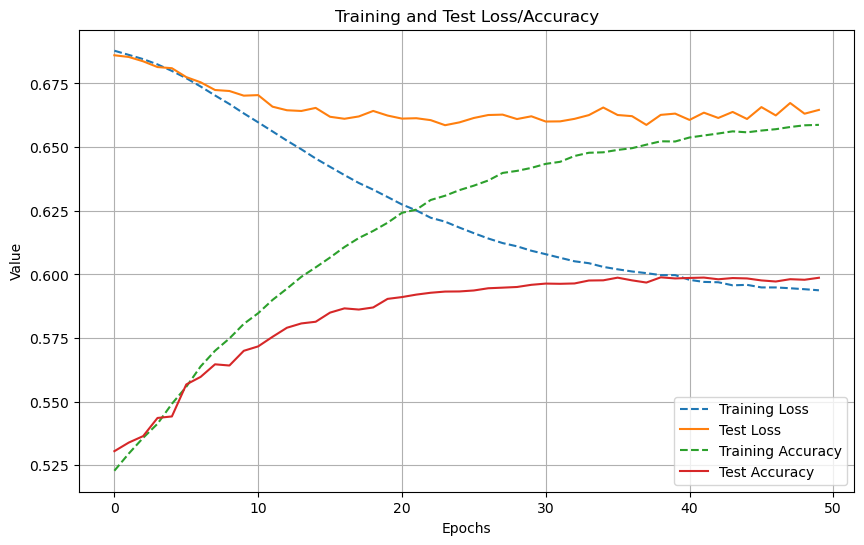

In [9]:
# LSTM 모델 구성
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 학습 진행을 표시하기 위한 Callback 설정
class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.epochs = self.params['epochs']
        self.tqdm = tqdm(total=self.epochs, desc='Training Progress')

    def on_epoch_end(self, epoch, logs=None):
        self.tqdm.update(1)
        self.tqdm.set_postfix(loss=logs['loss'])

    def on_train_end(self, logs=None):
        self.tqdm.close()

# 학습 과정 시각화 및 히스토리 저장
tqdm_callback = TQDMProgressBar()
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    callbacks=[tqdm_callback]
)

# Loss 및 Accuracy 그래프
plt.figure(figsize=(10, 6))

# Training 및 Test Loss
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Test Loss', linestyle='-')

# Training 및 Test Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', linestyle='-')

# 그래프 설정
plt.title('Training and Test Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

In [10]:
# 최종 평가 (Test Set)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.6646, Test Accuracy: 0.5987


In [11]:
# Save
model.save(f'lstm_seq{TIMESTEPS}_batch{BATCH_SIZE}_steps{STEPS}.h5')